In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout

In [2]:
df = pd.read_csv('TSLA.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
1,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
2,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500
3,2010-07-07,3.280,3.326,2.996,3.160,3.160,34608500
4,2010-07-08,3.228,3.504,3.114,3.492,3.492,38557000


In [3]:
data = df['Open'].values
data = data.reshape(-1, 1)

In [4]:
dataset_train = np.array(data[:int(data.shape[0]*0.8)])
dataset_test = np.array(data[int(data.shape[0]*0.8):])

In [5]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_test = scaler.transform(dataset_test)

In [6]:
def create_dataset(df):
    x = []
    y = []
    for i in range(50, data.shape[0]):
        x.append(data[i-10:i, 0])
        y.append(data[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y

In [7]:
x_train, y_train = create_dataset(dataset_train)
x_test, y_test = create_dataset(dataset_test)


In [8]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [9]:
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [10]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=50, batch_size=32)

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))



Epoch 1/50


2023-01-06 00:04:02.207420: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


74/74 [==============================] - 4s 20ms/step - loss: 1141.7224
Epoch 2/50
74/74 [==============================] - 2s 20ms/step - loss: 778.6223
Epoch 3/50
74/74 [==============================] - 2s 21ms/step - loss: 634.5461
Epoch 4/50
74/74 [==============================] - 2s 21ms/step - loss: 564.0200
Epoch 5/50
74/74 [==============================] - 2s 22ms/step - loss: 531.6384
Epoch 6/50
74/74 [==============================] - 2s 21ms/step - loss: 520.1524
Epoch 7/50
74/74 [==============================] - 2s 21ms/step - loss: 517.0619
Epoch 8/50
74/74 [==============================] - 2s 21ms/step - loss: 515.4790
Epoch 9/50
74/74 [==============================] - 2s 21ms/step - loss: 514.5164
Epoch 10/50
74/74 [==============================] - 2s 21ms/step - loss: 380.4901
Epoch 11/50
74/74 [==============================] - 2s 21ms/step - loss: 154.4432
Epoch 12/50
74/74 [==============================] - 2s 21ms/step - loss: 98.2437
Epoch 13/50
74/74 [=====

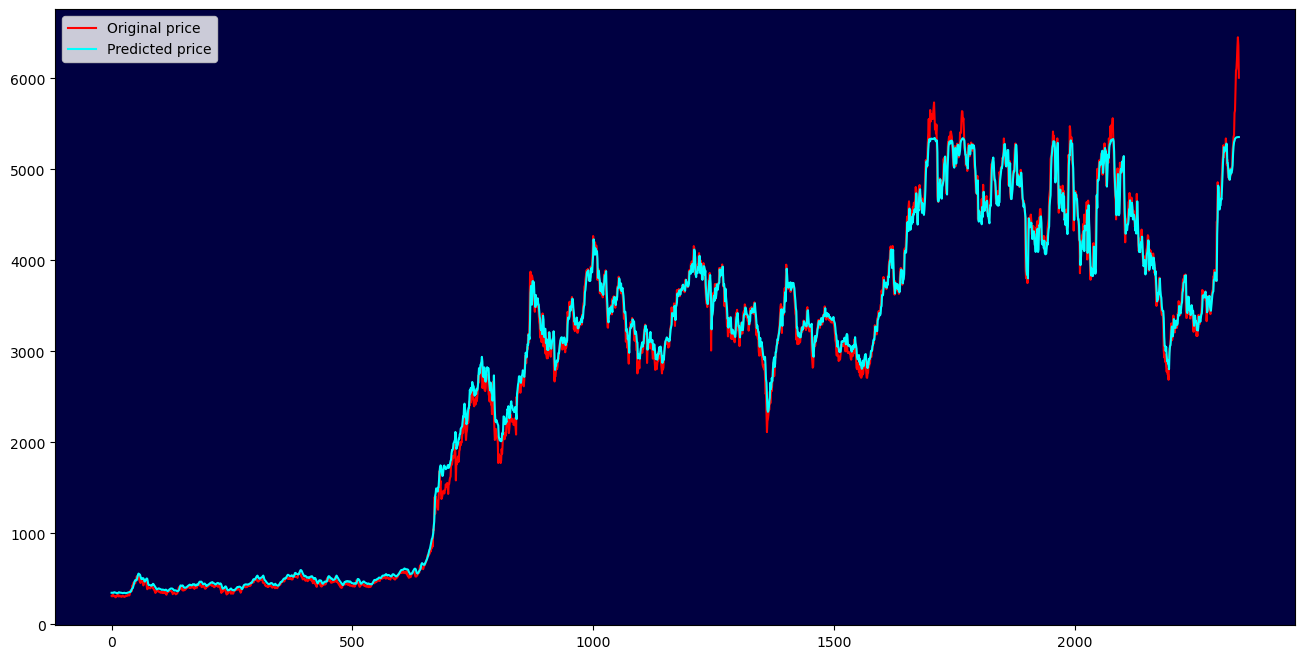

In [11]:
fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#000041')
ax.plot(y_test_scaled, color='red', label='Original price')
plt.plot(predictions, color='cyan', label='Predicted price')
plt.legend()